In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Calcolo della superficie in pixel del mare d'Aral attuale

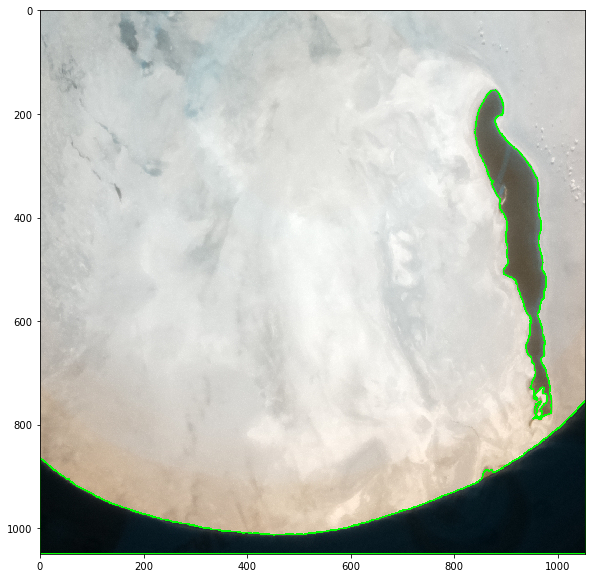

In [110]:
image = cv2.imread("./photo_523_cropped.jpg",1)
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image

_, binary = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV) #max 247
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
contours_filtered = [c for c in contours if cv2.arcLength(c,True)>500 and cv2.contourArea(c)<1050*1053*0.5]
image = cv2.drawContours(image, contours_filtered, -1, (0, 255, 0), 2)
fig,ax = plt.subplots(figsize=(20,10))
ax.imshow(image)
plt.show()

In [111]:
for contour in contours_filtered:
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    color = gray[cy,cx]
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour,True)
    print(cx,cy,color,area,perimeter,perimeter/area)

620 976 210 109313.0 2785.1412587165833 0.025478591372632562
920 419 87 31075.0 1711.8174455165863 0.055086643459906236


Il più piccolo dei due contorni è il mare d'Aral

In [112]:
aral_sea_actualarea = 31075.0

### Stima dell'area in passato
Applicando diverse soglie sulle tonalità bianco e poi grigio chiaro si ottengono i contorni del mare nelle diverse epoche.
Colori chiari corrispondono ad aree secche da molto tempo

Per esempio con soglia 234 il risultato è:

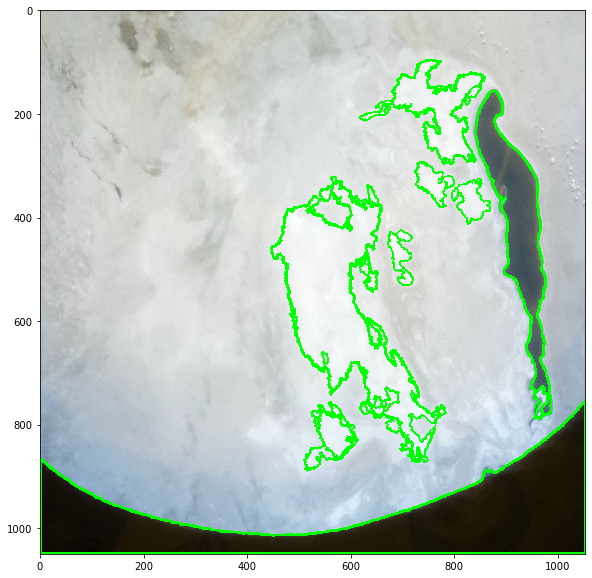

In [116]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 234, 255, cv2.THRESH_BINARY_INV) #max 247 min 213
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
contours_filtered = [c for c in contours if cv2.arcLength(c,True)>500 and cv2.contourArea(c)<1050*1053*0.7]
image = cv2.drawContours(image, contours_filtered, -1, (0, 255, 0), 2)
fig,ax = plt.subplots(figsize=(20,10))
ax.imshow(image)
plt.show()

Facendo qualche prova e confrontando con immagini storiche si può ipotizzare che la soglia 214 corrisponda all'area originale del lago

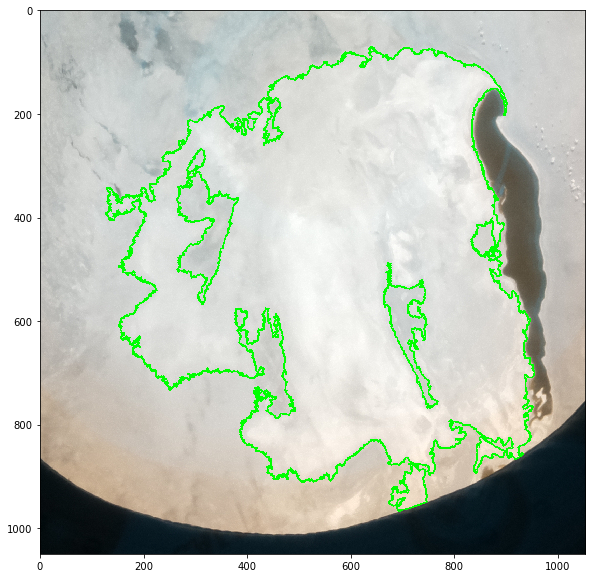

In [117]:
image = cv2.imread("./photo_523_cropped.jpg",1)
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 214, 255, cv2.THRESH_BINARY_INV) #max 247 min 213
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
contours_filtered = [c for c in contours if cv2.arcLength(c,True)>500 and cv2.contourArea(c)<1050*1053*0.7]
image = cv2.drawContours(image, contours_filtered, -1, (0, 255, 0), 2)
fig,ax = plt.subplots(figsize=(20,10))
ax.imshow(image)
plt.show()

In [118]:
original_total_area = 0
for contour in contours_filtered:
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    color = gray[cy,cx]
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour,True)
    print(cx,cy,color,area)
    original_total_area = original_total_area + area
original_total_area = original_total_area + area + aral_sea_actualarea

715 926 217 3629.5
577 491 238 460711.0
709 609 210 8020.0
316 415 226 13690.5
448 215 208 1272.0


In [119]:
original_total_area

519670.0

Analisi storica da soglia 214 a soglia 247

In [128]:
area_list = [original_total_area]
area_thr = [248]
image = cv2.imread("./photo_523_cropped.jpg",1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
for thr in range(247,213,-1):
    _, binary = cv2.threshold(gray, thr, 255, cv2.THRESH_BINARY_INV) #max 247
    # find the contours from the thresholded image
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_filtered = [c for c in contours if cv2.arcLength(c,True)>500 and cv2.contourArea(c)<1050*1053*0.7]
    area = 0
    for contour in contours_filtered:
        M = cv2.moments(contour)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        color = gray[cy,cx]
        area = area + cv2.contourArea(contour)
    area_list.append(original_total_area-area)
    area_thr.append(thr)

area_list = np.array(area_list)
area_thr = np.array(area_thr[::-1])

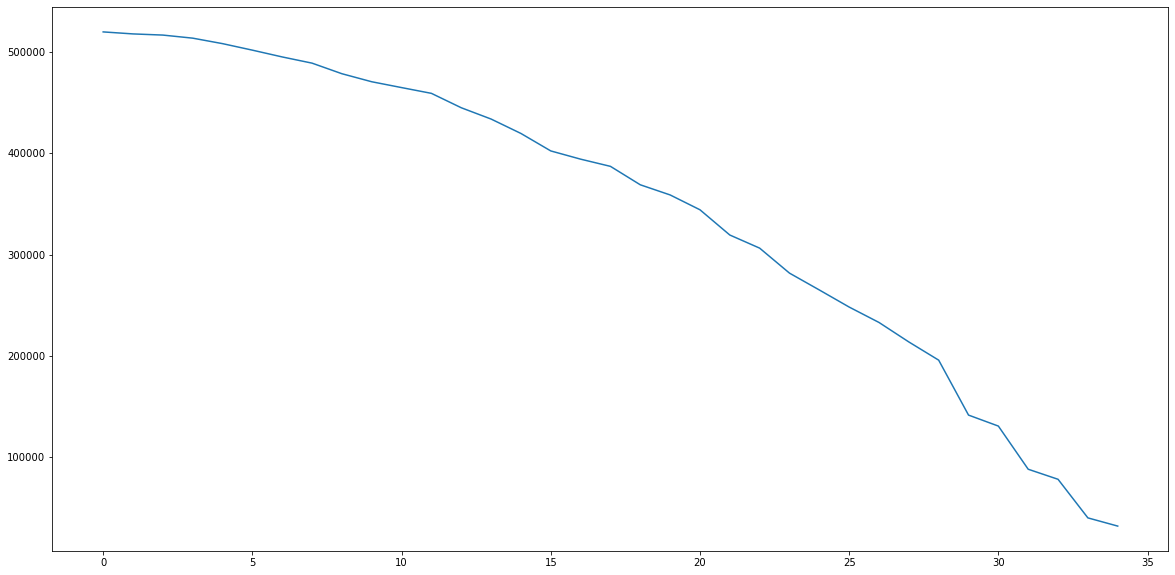

In [129]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(area_list)
plt.show()

 Dati reali presi da:
 https://public.wmo.int/en/resources/bulletin/future-of-aral-sea-lies-transboundary-co–operation

In [130]:
#data from https://public.wmo.int/en/resources/bulletin/future-of-aral-sea-lies-transboundary-co–operation
years = np.array([1960,1977,1986,1999,2006,2009,2013])
areas_km2 = np.array([67500,54831,44790,28756,16679,9452,10464])

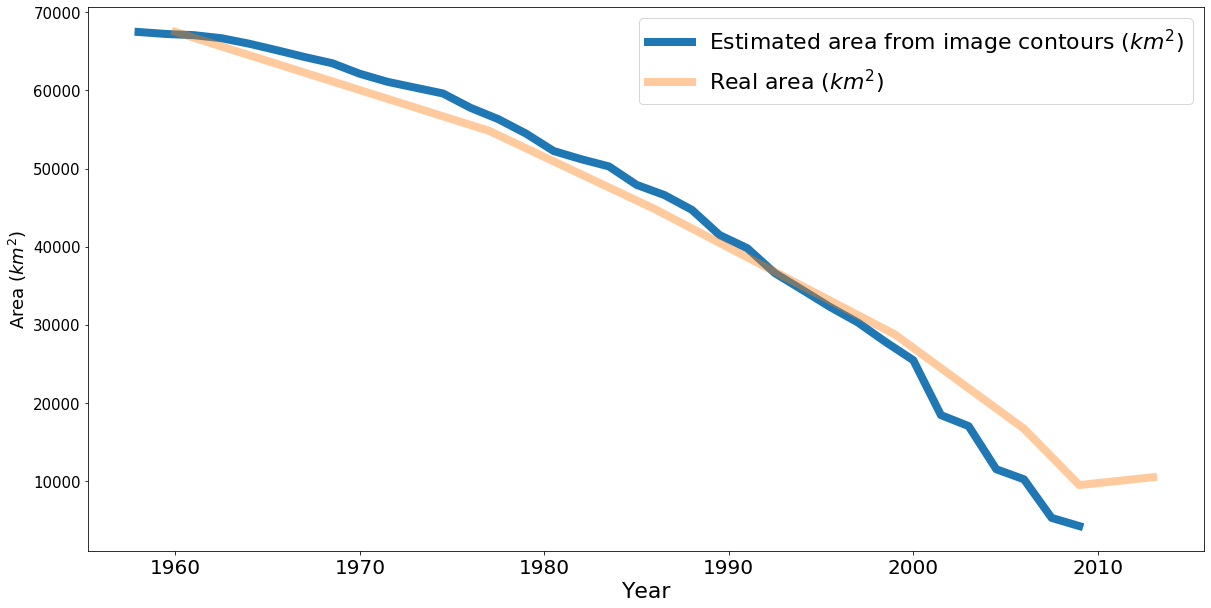

In [131]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot((area_thr-214)*1.5+1958,area_list/7.7, linewidth =8, label=r"Estimated area from image contours ($km^{2}$)")
ax.plot(years,areas_km2, linewidth =8,label=r"Real area ($km^{2}$)",alpha=0.4)
ax.set_xlabel("Year",fontsize=22)
ax.set_ylabel(r"Area ($km^{2}$)",fontsize=18)
ax.legend(fontsize=22)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
plt.show()